# Samples

- In stats analysis we use a sample to make statements about the population

- The sample does not look exactly like the population

- Need to learn about how samples behave in order to make statements about the population. -> stats inference

# Central Limit Theorem: 

If the individuals sampled from the population are independent, and if take a large sample size or if the distribution of the individuals is approximately normal, then the sampling distribution will be approximately normal. 

- sample mean varies according to normal distribution

- SD of all sample mean: 

    - on 'average', how far the estimation of sample mean will vary from the true value

    - var/ n**.5

## Standard Deviation of the Mean: 

on 'average', how far will a sample mean move from the population mean

# Example of Sampling of Measurement

- known: 

    - actual distribution is right skewed <- actual all the data distribution

    - actual mean = 125

    - std = 20

- samples: 

    - sample mean follows the normal distribution <- sampling distribution

        - describes all the possible estimates that we could have ended up with

    - sample n (sample count) = 20

    - sample mean = 125

    - std of mean = 20/ 25 ** .5 = 4

- sampling distribution is approximately normally distributed where we expect our sample mean to be equal to the true mean of the population, SD of the mean(or the SE of the mean) gives us an idea on 'average' how far will our estimate move from the true mean

    - quatile range(2.5% - 97.5%) is different. 

    - 95% of time mean of X: mean +/- 2* SD of mean

## Wendy's Trial on Exponential

- samples follow exponential distribution

- randomly choose 10 sample (10 interval pages): <= REALLY DEPEND ON WHAT SAMPLE YOU RANDOMLY CHOSEN
    
    - single samples: 
        
        - too variable
    
    - boot strapping: 

        - +/- 2* std range smaller, may or may not include the actual one. 

        - quantile may include the actual one, but range is too large

    - simple samples use the exponential distribution: 

        - range smaller than the single samples +/- 2 std
    
    - simple sample use the weibull distribution: 

        - range larger than the exponential func



(275, 5)


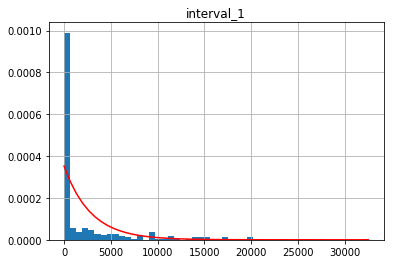

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import expon
from scipy.stats import weibull_min

itvl = 'interval_1'
j_df = pd.read_csv('check_j.csv')
j_df = j_df.loc[j_df.index.repeat(j_df['Occurances'])]
j_df.sort_values(['Device', 'page'], inplace = True)

j_df[itvl] = j_df.groupby('Device')['page'].diff()
j_df[itvl].fillna(j_df['page'], inplace = True)

total_image = j_df[itvl].sum()
occur = j_df.shape[0]
mibf = np.mean(j_df[itvl])
# plot the expo density prob curve
j_df.hist(itvl, bins = 50, normed = True) 
x = np.linspace(0, j_df[itvl].max(), 50)
plt.plot(x, expon.pdf(x, scale = mibf), 'r-') 

# # checked with the weibull distribution, and shape == 1 which is expo
# shape, loc, scale = weibull_min.fit(j_df[itvl], floc = 0)
# print (shape, scale)

print (j_df.shape)


- Sample size = 10, get from the exponential distribution (total sample is 275)

- Check single sample mean, and SD of sample mean

- Check bootstapping how much the SD of sample mean could be improved

In [71]:
# run the code last line for the data
import numpy as np

interv_data = j_df[itvl]
print ('mibf of total report: {:.2f}'.format(np.mean(interv_data)))
single_sample = np.random.choice(interv_data, size = 20, replace = False)
# single_sample = np.array([25., 5241., 1101., 9534., 0., 346., 0., 112., 1411., 20005.])

# check the single sample mean and SD
s_mean = np.mean(single_sample)
s_std = np.std(single_sample)/ len(single_sample) ** .5
print ()
print ('single sample mean is {:.2f}, single sample std is {:.2f}'.format(s_mean, s_std))
print ('single sample interval, 95% interval, lower is {:.2f}, upper is {:.2f}'.format(s_mean - 2* s_std, s_mean + 2* s_std))

from stats_bootstrapping import Bootstrapping

b_sample = Bootstrapping(single_sample)
b_resample = b_sample.simulate()

bs_mean = np.mean(b_sample.b_means())
bs_std_1 = (np.sum(np.var(b_resample, axis = 1))/ b_resample.shape[0] ** 2) ** .5
print ('bootstrapping mean interval, 95% interval, lower is {:.2f}, upper is {:.2f}'.format(bs_mean - 2* bs_std_1, bs_mean + 2* bs_std_1))

bs_std_2 = np.std(b_resample)/ (len(b_resample) ** .5)
print ('bootstrapping mean interval, 95% interval, lower is {:.2f}, upper is {:.2f}'.format(bs_mean - 2* bs_std_2, bs_mean + 2* bs_std_2))


print ('bootstrapping mean percentile, 95% interval, lower is {:.2f}, upper is {:.2f}'.format(np.quantile(np.mean(b_resample, axis = 1), .025), np.quantile(np.mean(b_resample, axis = 1), .975)))

# check the mean by the expo interval
import scipy.stats as st
def exp_conf_interval(alpha, page_number, jam_occur): 
    '''
    this is to calculate the confidence interval for exponential distribution
    '''
    upper = 2 * page_number / st.chi2.ppf(alpha/2, 2 * jam_occur)
    lower = 2 * page_number / st.chi2.ppf((1 - alpha/2), 2 * jam_occur)
    return (lower, upper)

lower, upper = exp_conf_interval(.05, np.sum(single_sample), len(single_sample))
print ('exponential distribution/ single sample, 95% interval, lower is {:.2f}, upper is {:.2f}'.format(lower, upper))

# check with weibull interval 
from scipy.stats import weibull_min

shape, loc, scale = weibull_min.fit(single_sample, floc = 0)
w_lower, w_upper = weibull_min.interval(.95, c = shape, loc = loc, scale = scale)
print ('weibull distribution/ single sample, 95% interval, lower is {:.2f}, upper is {:.2f}'.format(w_lower, w_upper))

mibf of total report: 2840.68

single sample mean is 3982.75, single sample std is 1382.69
single sample interval, 95% interval, lower is 1217.38, upper is 6748.12
bootstrapping mean interval, 95% interval, lower is 3871.24, upper is 4112.95
bootstrapping mean interval, 95% interval, lower is 3868.19, upper is 4115.99
bootstrapping mean percentile, 95% interval, lower is 1580.82, upper is 6868.64
exponential distribution/ single sample, 95% interval, lower is 2684.62, upper is 6520.27
weibull distribution/ single sample, 95% interval, lower is 156.55, upper is 22810.43


(array([1.41222991e-05, 4.50148284e-05, 1.30631267e-04, 1.72998164e-04,
        2.45374947e-04, 2.80680695e-04, 3.68062421e-04, 4.06016099e-04,
        4.20138399e-04, 4.53678859e-04, 5.03106906e-04, 4.73979664e-04,
        5.17229205e-04, 5.09285412e-04, 4.47500353e-04, 4.76627595e-04,
        4.32495410e-04, 3.79536789e-04, 3.97189662e-04, 3.13338512e-04,
        2.96568281e-04, 2.85093913e-04, 2.17130349e-04, 1.77411383e-04,
        1.61523796e-04, 1.26218048e-04, 1.20039542e-04, 9.00296568e-05,
        7.67900014e-05, 5.11933343e-05, 5.73718401e-05, 4.50148284e-05,
        2.91272419e-05, 2.29487361e-05, 1.58875865e-05, 1.94181613e-05,
        1.50049428e-05, 7.94379325e-06, 5.29586217e-06, 4.41321847e-06,
        4.41321847e-06, 4.41321847e-06, 8.82643694e-07, 8.82643694e-07,
        8.82643694e-07, 1.76528739e-06, 0.00000000e+00, 0.00000000e+00,
        8.82643694e-07, 8.82643694e-07]),
 array([  17.6  ,  130.896,  244.192,  357.488,  470.784,  584.08 ,
         697.376,  810.672

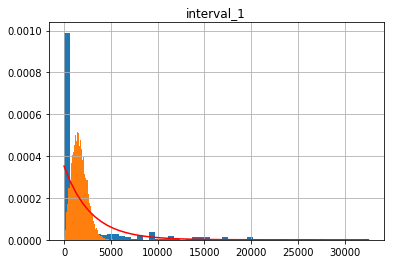

In [67]:
%matplotlib inline

# run this need to run the above lines. 

j_df.hist(itvl, bins = 50, normed = True) 
x = np.linspace(0, j_df[itvl].max(), 50)
plt.plot(x, expon.pdf(x, scale = mibf), 'r-') 

plt.hist(b_sample.b_means(), bins = 50, normed = True)

In [83]:
import scipy.stats as st

print (st.norm.cdf(-2.5))


0.006209665325776132


0.01752830049356854